In [1]:
# Import the data
import pandas as pd

df = pd.read_csv("data_banknote_authentication.txt")

X_col = ['3.6216', '8.6661', '-2.8073', '-0.44699']
y_col = ['0']

X = df[X_col]
y = df[y_col]

In [2]:
# Scale the imported data
# There may be some big differencies between datas.
# These differencies affects data importancies.
# So we scale the data and eliminate these effects.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=[X_col])

In [3]:
# Split the scaled data as train and test 
from sklearn.model_selection import train_test_split

# Default test rate is 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

y_train = y_train.iloc[:, -1].values.flatten()
y_test = y_test.iloc[:, -1].values.flatten()

y_train = pd.DataFrame(y_train, columns=[y_col])
y_test = pd.DataFrame(y_test, columns=[y_col])

In [4]:
# Create the Decision Tree Classifier and fit the splitted data (train)
from sklearn.tree import DecisionTreeClassifier

# We may also use 'entropy' as criterion. But we'll implement with 'gini' now.
# Maximum depth of the tree chose as 5. That means there can be maximum 5 nodes before a leaf node.
dtc1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtc1.fit(X_train, y_train)

dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [5]:
# Send the test data to get predicts
y_pred_1 = dtc1.predict(X_test)
y_pred_train_1 = dtc1.predict(X_train)

y_pred_2 = dtc2.predict(X_test)
y_pred_train_2 = dtc2.predict(X_train)

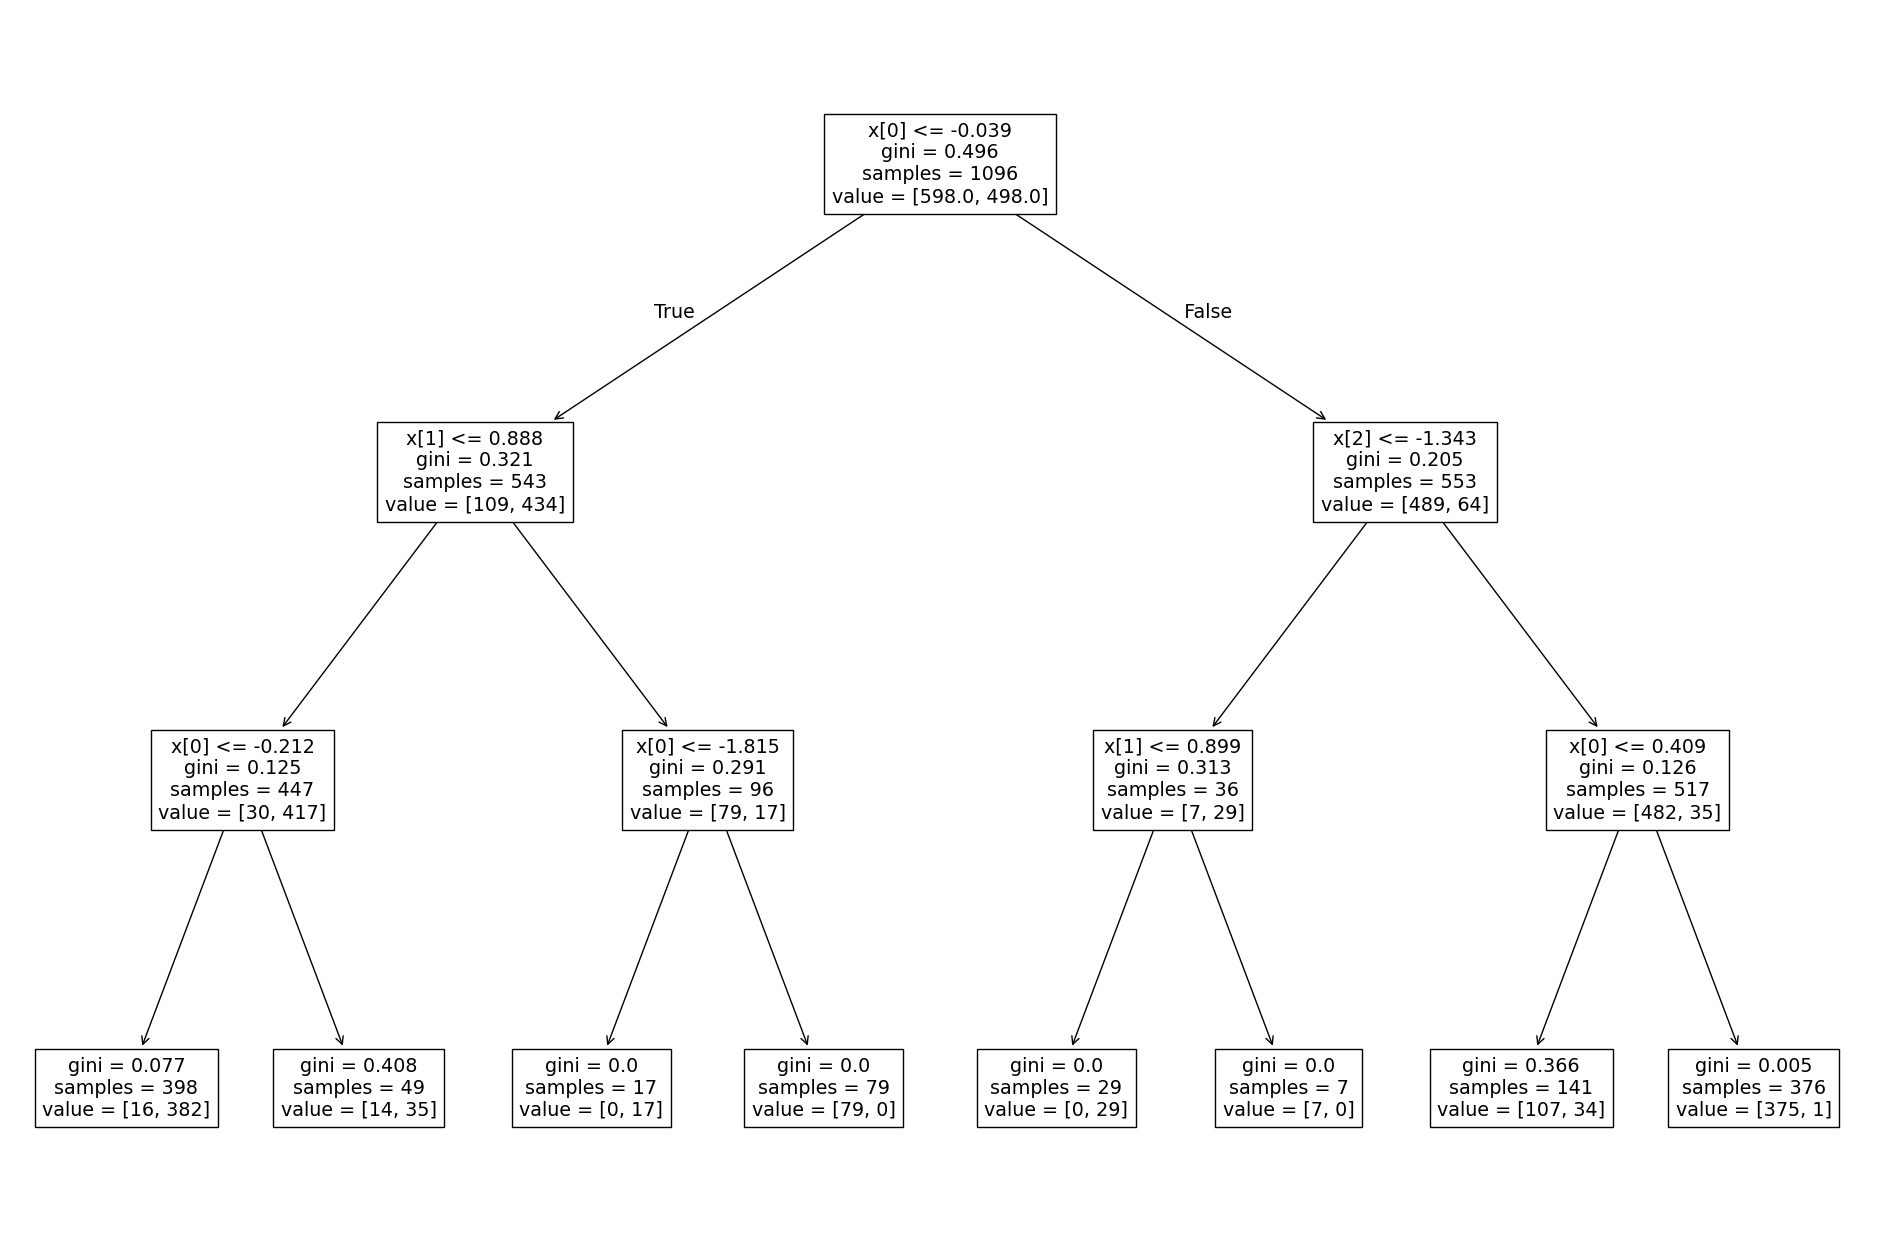

In [6]:
# Visualize the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the tree which has max_depth = 3
plt.figure(figsize=(24,16))
tree.plot_tree(dtc1.fit(X_train, y_train)) 
plt.show()

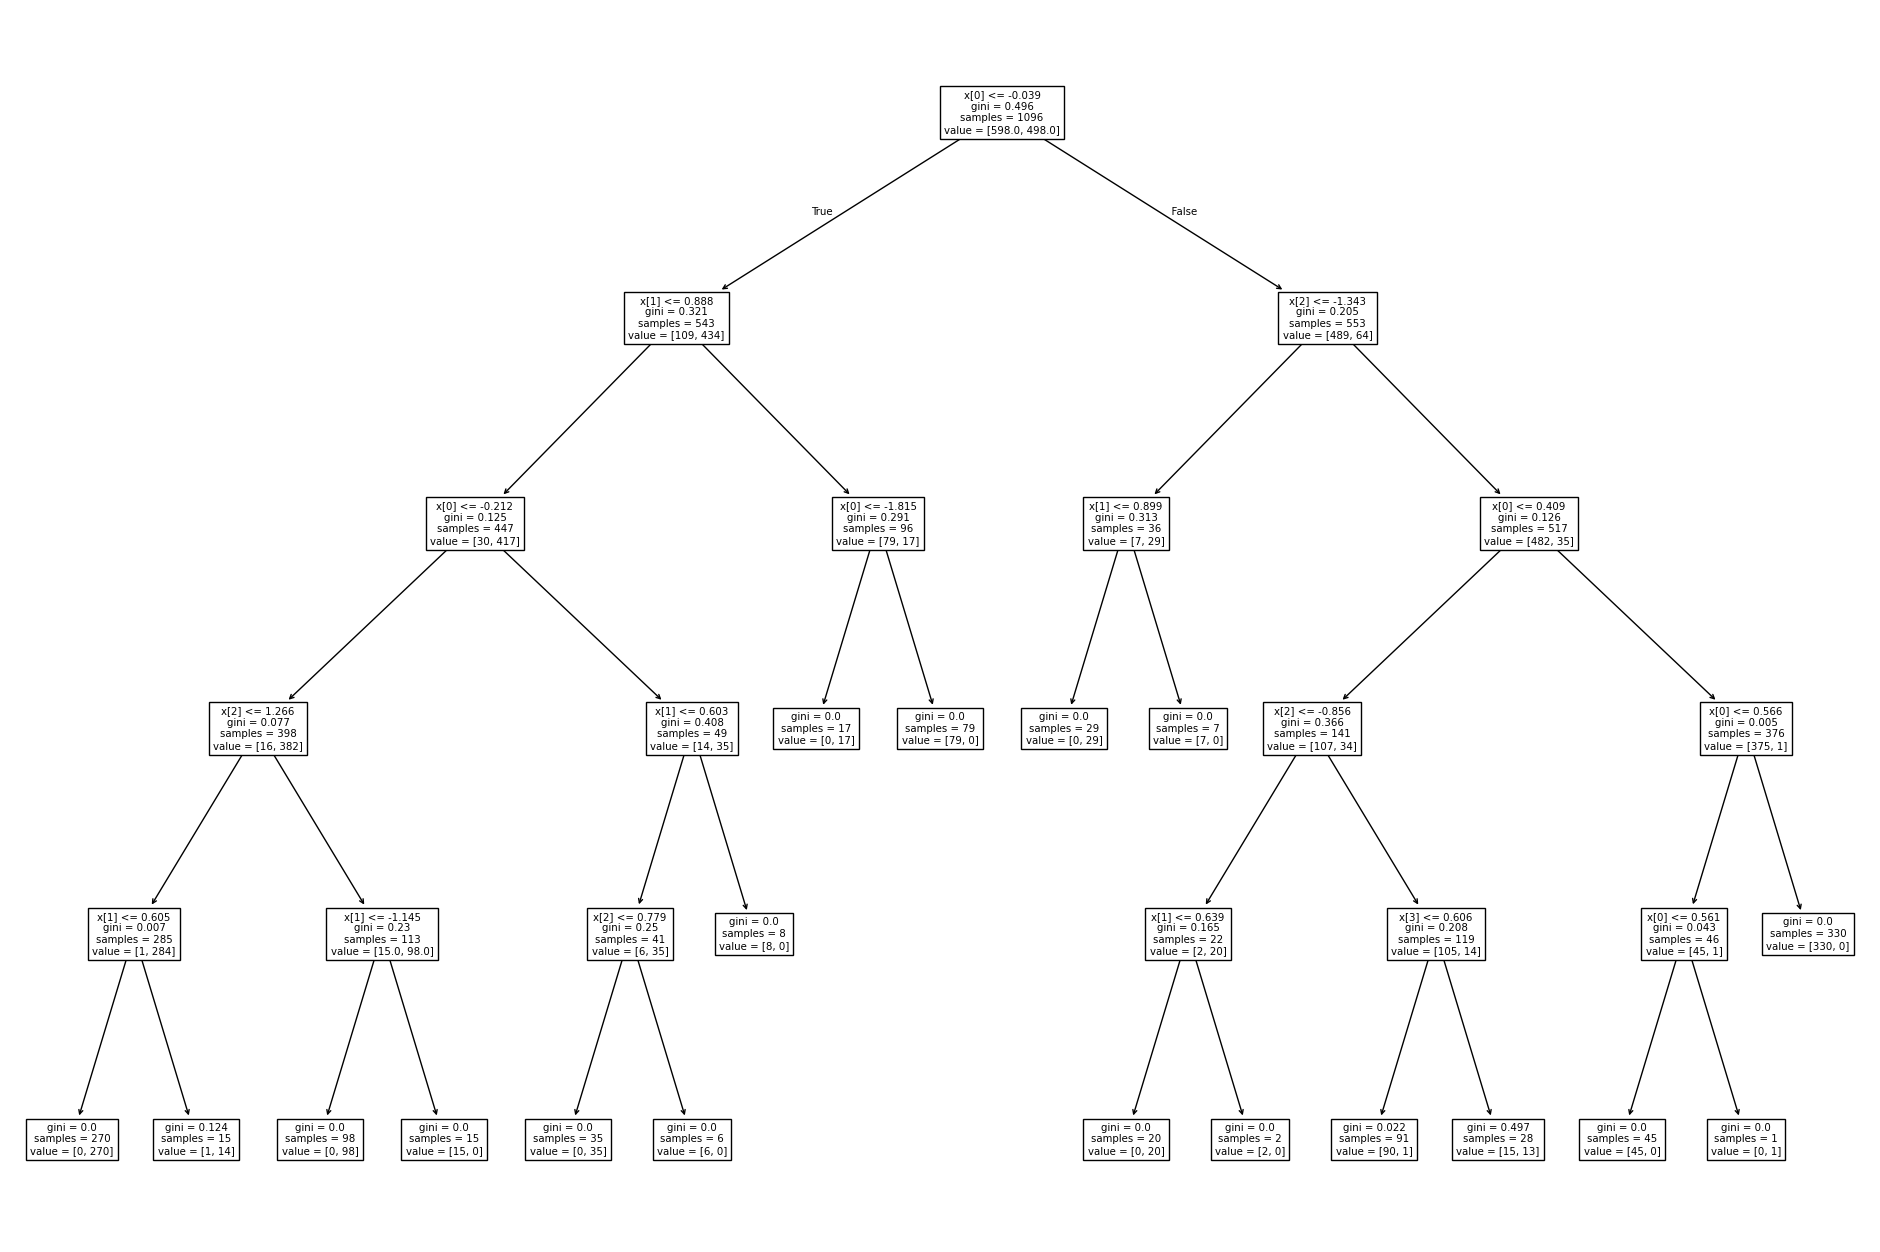

In [7]:
# Plot the tree which has max_depth = 5
plt.figure(figsize=(24,16))
tree.plot_tree(dtc2.fit(X_train, y_train)) 
plt.show()

In [17]:
# Calculate the accuracy, precision and f1 score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Scores of the tree which has max_depth = 3
y_pred_accuracy_1 = accuracy_score(y_test, y_pred_1, normalize=True, sample_weight=None)
y_pred_precision_1 = precision_score(y_test, y_pred_1, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
y_pred_f1_1 = f1_score(y_test, y_pred_1, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

print("Scores of Tree with max_depth=3")
print("\tAccuracy Score: {0:0.3f}".format(y_pred_accuracy_1))
print("\tPrecision Score: {0:0.3f}".format(y_pred_precision_1))
print("\tF1 Score: {0:0.3f}".format(y_pred_f1_1))

print("--------------------------------")

# Scores of the tree which has max_depth = 5
y_pred_accuracy_2 = accuracy_score(y_test, y_pred_2, normalize=True, sample_weight=None)
y_pred_precision_2 = precision_score(y_test, y_pred_2, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
y_pred_f1_2 = f1_score(y_test, y_pred_2, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

print("Scores of Tree with max_depth=5")
print("\tAccuracy Score: {0:0.3f}".format(y_pred_accuracy_2))
print("\tPrecision Score: {0:0.3f}".format(y_pred_precision_2))
print("\tF1 Score: {0:0.3f}".format(y_pred_f1_2))

Scores of Tree with max_depth=3
	Accuracy Score: 0.938
	Precision Score: 0.944
	F1 Score: 0.922
--------------------------------
Scores of Tree with max_depth=5
	Accuracy Score: 0.956
	Precision Score: 0.963
	F1 Score: 0.945


In [9]:
# Create the Classification Report
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred_1, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       163
           1       0.94      0.90      0.92       112

    accuracy                           0.94       275
   macro avg       0.94      0.93      0.94       275
weighted avg       0.94      0.94      0.94       275



In [10]:
# Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_1, labels=None, sample_weight=None, normalize=None)
conf_matrix

array([[157,   6],
       [ 11, 101]])

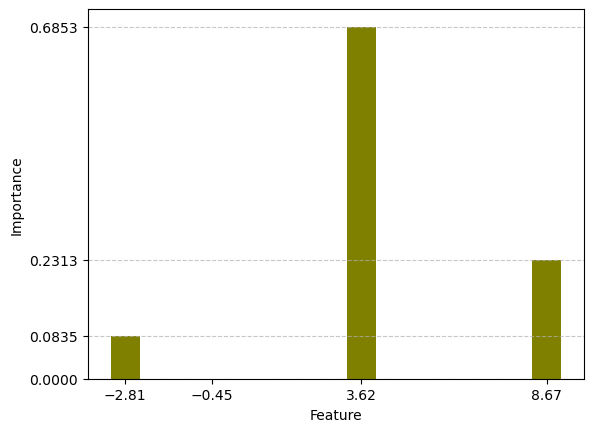

In [11]:
# Extract and plot the importance of each feature
feature_importance = dtc1.feature_importances_

feature_values = [float(x[0]) for x in X.columns.values]

df_2 = pd.DataFrame({'Feature': feature_values, 'Importance': feature_importance})

x_values = df_2['Feature'].values
y_values = df_2['Importance'].values

plt.bar(x_values, y_values, color='olive')
plt.xticks(x_values)
plt.yticks(y_values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)